In [3]:
# Import all necessary packages
import pandas as pd
import sklearn.metrics 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [4]:
# Read in train and test data 
# Train = 2016, Test = 2017

temp_df = pd.read_csv("../train.csv", nrows=0)  # Read only the header
total_columns = len(temp_df.columns)
columns_to_use = temp_df.columns[2:total_columns] 
train_df = pd.read_csv("../train.csv", usecols=columns_to_use)


test_df = pd.read_csv("../test.csv", usecols=columns_to_use)

train_df.head()

,building_id,meter,date,meter_reading,site_id,building_id_kaggle,site_id_kaggle,sub_primaryspaceusage,sqm,sqft,timezone,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed,season
0,Bear_education_Alfredo,electricity,2016-01-01,2.9050,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.246861,1.927009,0.254484,0.351088,10.801125,1018.888301,172.924863,3.807399,Winter
1,Bear_education_Alfredo,electricity,2016-01-02,2.7700,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.993973,1.997893,0.892188,0.409453,11.105558,1014.347411,181.359441,4.202455,Winter
2,Bear_education_Alfredo,electricity,2016-01-03,2.6725,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.660314,1.946017,0.778475,0.552568,11.167389,1010.396019,208.978674,4.015919,Winter
3,Bear_education_Alfredo,electricity,2016-01-04,4.5650,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.048507,1.987616,-0.268905,0.479493,11.089874,1008.903334,211.377040,3.909701,Winter
4,Bear_education_Alfredo,electricity,2016-01-05,4.7825,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,4.745567,2.007311,0.321921,1.033857,11.723586,1012.747700,170.002007,3.528571,Winter


In [4]:
train_df['building_id'].nu

,building_id,meter,meter_reading,site_id,building_id_kaggle,site_id_kaggle,sub_primaryspaceusage,sqm,sqft,timezone,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed,season
date,,,,,,,,,,,,,,,,,,,
2016-01-01,Bear_education_Alfredo,electricity,2.9050,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.246861,1.927009,0.254484,0.351088,10.801125,1018.888301,172.924863,3.807399,Winter
2016-01-02,Bear_education_Alfredo,electricity,2.7700,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.993973,1.997893,0.892188,0.409453,11.105558,1014.347411,181.359441,4.202455,Winter
2016-01-03,Bear_education_Alfredo,electricity,2.6725,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.660314,1.946017,0.778475,0.552568,11.167389,1010.396019,208.978674,4.015919,Winter
2016-01-04,Bear_education_Alfredo,electricity,4.5650,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.048507,1.987616,-0.268905,0.479493,11.089874,1008.903334,211.377040,3.909701,Winter
2016-01-05,Bear_education_Alfredo,electricity,4.7825,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,4.745567,2.007311,0.321921,1.033857,11.723586,1012.747700,170.002007,3.528571,Winter


In [5]:
meter_reading_series = train_df['meter_reading']

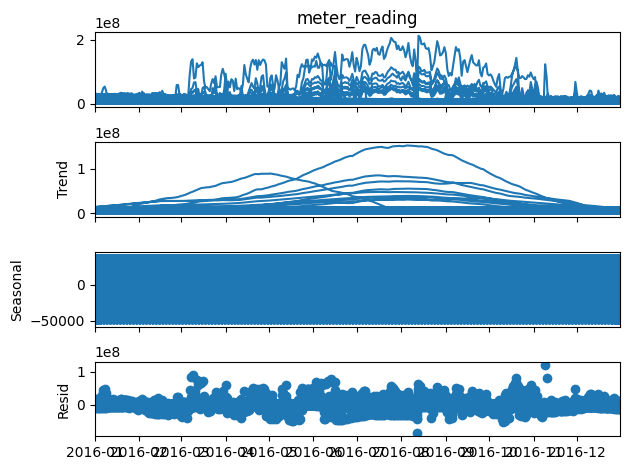

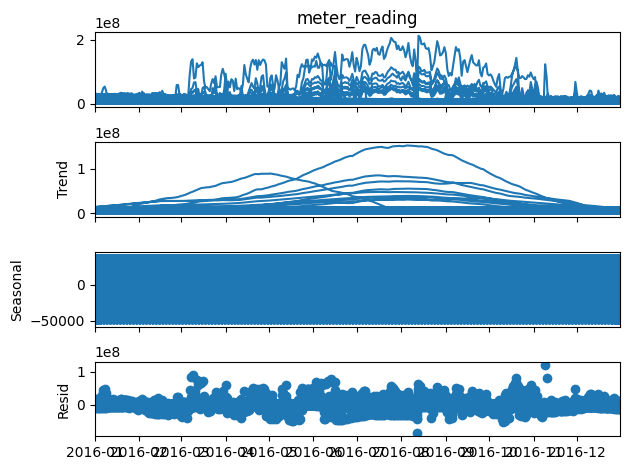

In [13]:
decomposition = seasonal_decompose(meter_reading_series, model='additive', period=91)  # Adjust 'period' based on your data's seasonality
decomposition.plot()  # This will show trend, seasonal, and residual components

In [38]:
# This can take some time
#sarima_model = pm.auto_arima(meter_reading_series, seasonal=True, m=3, stepwise= True, )  # m is the seasonal period


sarima_model = pm.auto_arima(meter_reading_series,
                             start_p=0, start_q=0, # Starting values for AR and MA parts
                             max_p=5, max_q=5, # Max values for AR and MA parts (can adjust based on need)
                             seasonal=True,  # Enable seasonal differencing
                             m=91,             # Quarterly data, so seasonality is set to 3 months
                             start_P=0, start_Q=0, # Starting values for seasonal AR and MA parts
                             max_P=3, max_Q=3, # Max values for seasonal AR and MA parts (can adjust based on need)
                             d=1, D=1,       # Typical differencing parameters; might need adjustment
                             trace=True,     # Print status on the fits
                             error_action='ignore',   # Don't want to know if an order does not work
                             suppress_warnings=True,  # Suppress warnings
                             stepwise=True,  # Use the stepwise algorithm
                             approximation=True) # Set to False to avoid approximation for large datasets

# Print out the summary of the best SARIMA model found
print(sarima_model.summary())



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=13988891.987, Time=2.52 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=13873421.338, Time=13.44 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=39.21 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=13983280.405, Time=3.36 sec


: 

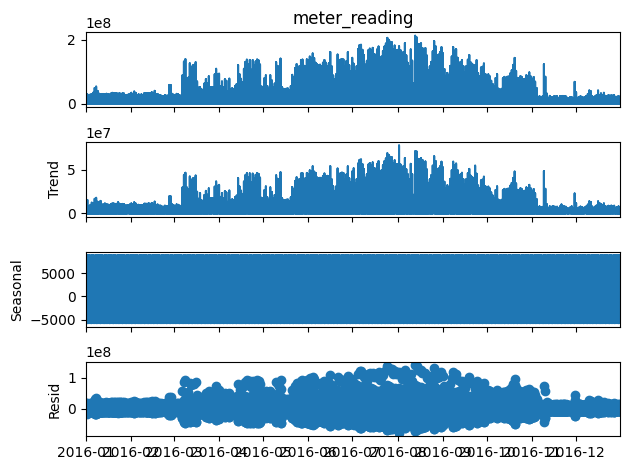

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Sort the DataFrame by date just in case
train_df.sort_index(inplace=True)

# Extract the 'meter_reading' series
meter_reading_series = train_df['meter_reading']

# Seasonal Decompose to observe trend and seasonality
decomposition = seasonal_decompose(meter_reading_series, model='additive', period=3)  # Quarterly seasonality
decomposition.plot()
plt.show()

# Note: We'll assume the data is already aggregated on a daily basis per building/meter.
# If there were multiple readings per day, you'd need to aggregate these (e.g., by taking the mean).



In [9]:
# Prepare an empty DataFrame to store forecasts
forecasts = pd.DataFrame()

# Loop over each building and meter
for (building, meter), group in train_df.groupby(['building_id', 'meter']):
    print("Current building/meter", building, meter)
    # Ensure the data is in chronological order
    series = group.set_index('date').sort_index()['meter_reading']
    
    # Fit the SARIMA model (consider diagnostic plots and tests to choose orders)
    print("Fitting model")
    sarima_model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 91)).fit(disp=False)
    
    print("Getting forecast")
    # Forecast for 2017 (365 or 366 days, depending on leap year)
    forecast = sarima_model.get_forecast(steps=365)
    forecast_series = forecast.predicted_mean  # Get the forecast values
    
    print("Storing Predictions")
    # Store forecasts (adjust index to match 2017 dates if necessary)
    forecasts[(building, meter)] = forecast_series
    break

Current building/meter Bear_education_Alfredo electricity
Fitting model


/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Getting forecast
Storing Predictions


In [40]:
best_models = {}

# Loop through each building and meter combination
for (building, meter), group in train_df.groupby(['building_id', 'meter']):
    print(building, meter)
    # Prepare the time series
    series = group.set_index('date').sort_index()['meter_reading']

    # Find the best SARIMA parameters using auto_arima
    # Note: Adjust the seasonal order 'm' based on your data's frequency and seasonality
    print("Find Sarima parameters")
    sarima_model = auto_arima(series, start_p=0, start_q=0,
                              max_p=1, max_q=1, m=91,  # Assuming daily data with quarterly seasonality
                              seasonal=True, trace=True, 
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True)
    
    print("Done finding parameters")
    print(sarima_model)
    # Fit the SARIMA model with the best parameters
    order = sarima_model.order
    seasonal_order = sarima_model.seasonal_order
    print("Fitting sarima model")
    best_fit = SARIMAX(series, order=order, seasonal_order=seasonal_order).fit(disp=False)
    
    print("Done fitting model")
    # Store the best model
    best_models[(building, meter)] = best_fit


Bear_education_Alfredo electricity
Find Sarima parameters
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[91] intercept   : AIC=inf, Time=24.07 sec
 ARIMA(0,0,0)(0,0,0)[91] intercept   : AIC=1234.998, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[91] intercept   : AIC=inf, Time=7.86 sec
 ARIMA(0,0,1)(0,0,1)[91] intercept   : AIC=1021.519, Time=4.57 sec
 ARIMA(0,0,0)(0,0,0)[91]             : AIC=2159.615, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[91] intercept   : AIC=1034.468, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[91] intercept   : AIC=inf, Time=24.11 sec
 ARIMA(0,0,1)(0,0,2)[91] intercept   : AIC=1023.468, Time=19.00 sec
 ARIMA(0,0,1)(1,0,0)[91] intercept   : AIC=1020.788, Time=11.71 sec
 ARIMA(0,0,1)(2,0,0)[91] intercept   : AIC=1096.098, Time=129.95 sec
 ARIMA(0,0,1)(2,0,1)[91] intercept   : AIC=inf, Time=113.82 sec
 ARIMA(0,0,0)(1,0,0)[91] intercept   : AIC=1225.291, Time=6.82 sec
 ARIMA(1,0,1)(1,0,0)[91] intercept   : AIC=944.068, Time=8.62 sec
 ARIMA(1,0,1)(0,0,0)[91] intercept   : AI

/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sameeraboppana/work_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Done fitting model
Bear_education_Alvaro electricity
Find Sarima parameters
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[91] intercept   : AIC=inf, Time=23.53 sec
 ARIMA(0,1,0)(0,0,0)[91] intercept   : AIC=5427.653, Time=0.01 sec


KeyboardInterrupt: 

In [2]:
train_df['building_id'].nunique()

NameError: name 'train_df' is not defined

In [47]:
train_df['bui']

,building_id,meter,date,meter_reading,site_id,building_id_kaggle,site_id_kaggle,sub_primaryspaceusage,sqm,sqft,timezone,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed,season
0,Bear_education_Alfredo,electricity,2016-01-01,2.9050,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.246861,1.927009,0.254484,0.351088,10.801125,1018.888301,172.924863,3.807399,Winter
1,Bear_education_Alfredo,electricity,2016-01-02,2.7700,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.993973,1.997893,0.892188,0.409453,11.105558,1014.347411,181.359441,4.202455,Winter
2,Bear_education_Alfredo,electricity,2016-01-03,2.6725,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.660314,1.946017,0.778475,0.552568,11.167389,1010.396019,208.978674,4.015919,Winter
3,Bear_education_Alfredo,electricity,2016-01-04,4.5650,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,5.048507,1.987616,-0.268905,0.479493,11.089874,1008.903334,211.377040,3.909701,Winter
4,Bear_education_Alfredo,electricity,2016-01-05,4.7825,Bear,636.0,4.0,Education,609.8,6564.0,US/Pacific,4.745567,2.007311,0.321921,1.033857,11.723586,1012.747700,170.002007,3.528571,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447613,Wolf_education_Vivian,water,2016-12-27,2541.3347,Wolf,1049.0,12.0,College Classroom,8770.0,94399.0,Europe/Dublin,7.401974,1.708130,2.873026,0.335702,11.234510,1023.828171,183.783788,2.760526,Winter
447614,Wolf_education_Vivian,water,2016-12-28,400.2206,Wolf,1049.0,12.0,College Classroom,8770.0,94399.0,Europe/Dublin,5.772088,1.488857,0.987033,0.345231,10.911172,1024.541484,149.736150,2.201589,Winter
447615,Wolf_education_Vivian,water,2016-12-29,1874.3003,Wolf,1049.0,12.0,College Classroom,8770.0,94399.0,Europe/Dublin,5.522687,1.536773,0.978414,0.956951,11.374362,1020.217311,160.204079,2.843663,Winter
447616,Wolf_education_Vivian,water,2016-12-30,1550.6894,Wolf,1049.0,12.0,College Classroom,8770.0,94399.0,Europe/Dublin,3.787500,2.771180,-2.114693,0.374868,10.729428,1018.767864,230.151381,3.580044,Winter
